### Series

- 1차원 배열같은 자료구조(어떤 NumPy 자료형이라도 담을 수 있음)
- 색인(index)을 가지고 있음 # 색인이 숫자가 아니여도 된다!

In [31]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [4]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [8]:
obj2 = pd.Series([4,7,-5,3], index = ['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [10]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [11]:
obj2['a']

-5

In [12]:
obj2['d'] = 6

In [14]:
obj2[['a','b','d']]

a   -5
b    7
d    6
dtype: int64

In [15]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

## DataFrame
- 표 형식의 자료구조
- 선언하는 방법
- 같은 길이의 리스트를 포함하는 딕셔너리를 사용
- Numpy 배열을 사용

In [46]:
data = {'country': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'times': [10, 20, 30, 40, 50, 60]}
frame = pd.DataFrame(data)

In [47]:
frame

,country,year,times
0,Ohio,2000,10
1,Ohio,2001,20
2,Ohio,2002,30
3,Nevada,2001,40
4,Nevada,2002,50
5,Nevada,2003,60


In [48]:
pd.DataFrame(data, columns=['year', 'country', 'times'])

,year,country,times
0,2000,Ohio,10
1,2001,Ohio,20
2,2002,Ohio,30
3,2001,Nevada,40
4,2002,Nevada,50
5,2003,Nevada,60


In [49]:
# 딕셔너리에 없는 값을 넘기면, 결측치(NaN)로 선언
frame2 = pd.DataFrame(data, columns=['year', 'country', 'times', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,country,times,debt
one,2000,Ohio,10,NaN
two,2001,Ohio,20,NaN
three,2002,Ohio,30,NaN
four,2001,Nevada,40,NaN
five,2002,Nevada,50,NaN
six,2003,Nevada,60,NaN


In [50]:
frame2['country']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: country, dtype: object

In [52]:
frame2.country

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: country, dtype: object

In [57]:
frame2['debt'] = 16.5
frame2

,year,country,times,debt
one,2000,Ohio,10,16.5
two,2001,Ohio,20,16.5
three,2002,Ohio,30,16.5
four,2001,Nevada,40,16.5
five,2002,Nevada,50,16.5
six,2003,Nevada,60,16.5


In [60]:
## Nan에다가 각각의 값을 넣는 방법

val = pd.Series([100,200,300,400,500,600], 
                index = ['one','two','three','four','five','six'])

frame2['debt'] = val
frame2

,year,country,times,debt
one,2000,Ohio,10,100
two,2001,Ohio,20,200
three,2002,Ohio,30,300
four,2001,Nevada,40,400
five,2002,Nevada,50,500
six,2003,Nevada,60,600


## 핵심기능

- 재색인 (Reindexing) : reindex()


In [63]:
obj = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
obj

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [67]:
obj2 = obj.reindex(['a','b','C','D','e','F'])
obj2

a    1.0
b    2.0
C    NaN
D    NaN
e    5.0
F    NaN
dtype: float64

# 하나의 로우나 컬럼 삭제하기 : drop()

In [72]:
obj_drop = pd.Series(np.arange(5),index=['a','b','c','d','e'])
obj_drop

# np.arange(5) = [0,1,2,3,4] 로 변경해서 써도 된다.

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [73]:
obj.drop(['d','c'])

a    1
b    2
e    5
dtype: int64

In [74]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

#np.arange(16) => 0~15까지의 데이터를 넣어주어라..
#reshape => 4행 4열로 만들어 주어라.

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [75]:
# 디폴트: row값 삭제
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [76]:
# 컬럼값 삭제
data.drop('two', axis=1)
# data.drop(['two', 'four'], axis='columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


## 선택, 필터링

In [78]:
data1 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data1
#np.arange(16) => 0~15까지의 데이터를 넣어주어라..
#reshape => 4행 4열로 만들어 주어라.

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [79]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [81]:
data[['two','four']]

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [83]:
data[1:3]   #1번째랑 2번째를 뽑아온다.

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


In [84]:
data[data['three']>5]   # three가 5보다 큰 것을 가져와라

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## 산술연산과 데이터정렬

In [85]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [86]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [88]:
# 짝이 맞다면 통합, 아니면 NaN
# 데이터베이스의 외부조인과 유사
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [89]:
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [90]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [91]:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


# 함수적용과 매핑 (너무나 중요!!)

In [93]:
frame = pd.DataFrame(np.random.randn(4,3), columns = list('abc'),
                     index = ['one','two','three','four'])
frame

,a,b,c
one,-0.204708,0.478943,-0.519439
two,-0.555730,1.965781,1.393406
three,0.092908,0.281746,0.769023
four,1.246435,1.007189,-1.296221


In [94]:
abs(frame) #절대값 씌우기

,a,b,c
one,0.204708,0.478943,0.519439
two,0.555730,1.965781,1.393406
three,0.092908,0.281746,0.769023
four,1.246435,1.007189,1.296221


## 함수적용 : apply(f)

In [95]:
f = lambda x : x.max()-x.min()
frame.apply(f)

a    1.802165
b    1.684034
c    2.689627
dtype: float64

In [96]:
frame.apply(f, axis='columns')

one      0.998382
two      2.521511
three    0.676115
four     2.542656
dtype: float64

In [97]:
#### 이해가 안되어요!!! ASK!!!!

def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,a,b,c
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


## 매핑 : applymap(f),map(format)

In [100]:
format = lambda x : '%.2f'% x
frame.applymap(format)

,a,b,c
one,-0.20,0.48,-0.52
two,-0.56,1.97,1.39
three,0.09,0.28,0.77
four,1.25,1.01,-1.30


# 정렬(sorting):sort_index(),sort_values()

In [102]:
obj = pd.Series(range(4), index = ['b','d','c','a'])
obj

b    0
d    1
c    2
a    3
dtype: int64

In [103]:
obj.sort_index()

a    3
b    0
c    2
d    1
dtype: int64

In [105]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [107]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [108]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [112]:
obj = pd.Series([4,3,2,1])

In [113]:
obj.sort_values()

3    1
2    2
1    3
0    4
dtype: int64

## 상관관계와 공분산(주식분석 해보기)

In [115]:
conda install pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas_datareader.data as web

# Yahoo! Finance 사이트에서 주식가격, 시가총액 읽어들이기
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

C:\Users\user\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [117]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-06-25,0.013276,0.022419,0.012636,0.006536
2020-06-26,-0.030726,-0.015458,-0.020016,-0.056496
2020-06-29,0.023047,0.021845,0.010747,0.025789
2020-06-30,0.008348,0.008518,0.025549,0.013362
2020-07-01,-0.001891,-0.018465,0.005847,0.017282


In [118]:
# 상관관계 계산
returns['MSFT'].corr(returns['IBM'])

0.594524173001745

In [119]:
#데이터 프레임에서 상관관계
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.529410,0.714471,0.645939
IBM,0.529410,1.000000,0.594524,0.526392
MSFT,0.714471,0.594524,1.000000,0.751249
GOOG,0.645939,0.526392,0.751249,1.000000


In [120]:
#데이터 프레임에서 공분산
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000334,0.000156,0.000226,0.000204
IBM,0.000156,0.000261,0.000167,0.000147
MSFT,0.000226,0.000167,0.000301,0.000225
GOOG,0.000204,0.000147,0.000225,0.000298


# 갯수 세기

In [121]:
obj = pd.Series(['a','a','a','b','b','c'])

In [122]:
obj.value_counts()

a    3
b    2
c    1
dtype: int64

## 삼성전자 주가 연습문제!

In [143]:
# https://finance.yahoo.com/
import pandas_datareader.data as web

df= web.DataReader('005930.KS','yahoo','2020-06-20','2020-07-02')


1. 삼성전자의 6월 주식을 데이터 프레임으로 만들기

In [144]:
df = web.DataReader('005930.KS','yahoo','2020-06-01','2020-06-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,51200,50600,50800,51200,16949183,51200
2020-06-02,51500,50800,51000,51400,14247933,51400
2020-06-03,55000,51700,51800,54500,49257814,54500
2020-06-04,57000,54600,55800,54600,40220334,54600
2020-06-05,55900,54000,54400,55500,22743629,55500
...,...,...,...,...,...,...
2020-06-24,53900,51600,51900,52900,24519552,52900
2020-06-25,53000,51900,52100,51900,18541624,51900
2020-06-26,53900,52200,52800,53300,21575360,53300


2. 종가('Close') 기준 가장 주가가 높았던 날짜 구하기

In [145]:
### 내풀이
df['Close'].idxmax()

Timestamp('2020-06-05 00:00:00')

In [151]:
## 다른풀이
max(df['Close'])

55500

In [152]:
df['Close'] == max(df['Close'])

Date
2020-06-01    False
2020-06-02    False
2020-06-03    False
2020-06-04    False
2020-06-05     True
              ...  
2020-06-24    False
2020-06-25    False
2020-06-26    False
2020-06-29    False
2020-06-30    False
Name: Close, Length: 22, dtype: bool

In [161]:
 df[df['Close'] == max(df['Close'])]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-05,55900,54000,54400,55500,22743629,55500
2020-06-09,56500,54400,55800,55500,23998831,55500


3. 종가('Close') 기준 가장 주가가 낮았던 날짜 구하기

In [153]:
min(df['Close'])

49900

In [154]:
df['Close'] == min(df['Close'])

Date
2020-06-01    False
2020-06-02    False
2020-06-03    False
2020-06-04    False
2020-06-05    False
              ...  
2020-06-24    False
2020-06-25    False
2020-06-26    False
2020-06-29    False
2020-06-30    False
Name: Close, Length: 22, dtype: bool

In [155]:
df[df['Close'] == min(df['Close'])]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,52000,49900,51400,49900,28772921,49900


In [164]:
df[df['Close'] == min(df['Close'])].index

DatetimeIndex(['2020-06-15'], dtype='datetime64[ns]', name='Date', freq=None)

4. 종가('Close') 기준 6월 평균 주가 구하기

In [157]:
df['Close'].mean()

52986.36363636364

5. 종가('Close') 기준 주가가 52000원 이상이었던 날짜 구하기

In [168]:
df[df['Close']>52000].index

DatetimeIndex(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-24', '2020-06-26', '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

6. 종가('Close') 기준 데이터 정렬하기(가격 낮은 순)

In [190]:
df['Close'].sort_values

<bound method Series.sort_values of 1     51200
2     51400
3     54500
4     54600
5     55500
      ...  
18    52900
19    51900
20    53300
21    52400
22    52800
Name: Close, Length: 22, dtype: int64>

7. 종가('Close') 기준 데이터 정렬하기(가격 높은 순)

In [192]:
df_high = df.sort_values(["Close"], ascending = [False])
df_high

,High,Low,Open,Close,Volume,Adj Close,date,Date_HI,year,month
5,55900,54000,54400,55500,22743629,55500,2020-06-05,2020-06-05,2020,6
7,56500,54400,55800,55500,23998831,55500,2020-06-09,2020-06-09,2020,6
8,55900,54900,55100,55400,16742493,55400,2020-06-10,2020-06-10,2020,6
6,56500,54700,56400,54900,25634965,54900,2020-06-08,2020-06-08,2020,6
4,57000,54600,55800,54600,40220334,54600,2020-06-04,2020-06-04,2020,6
...,...,...,...,...,...,...,...,...,...,...
19,53000,51900,52100,51900,18541624,51900,2020-06-25,2020-06-25,2020,6
17,52800,51100,52500,51400,18086152,51400,2020-06-23,2020-06-23,2020,6
2,51500,50800,51000,51400,14247933,51400,2020-06-02,2020-06-02,2020,6
1,51200,50600,50800,51200,16949183,51200,2020-06-01,2020-06-01,2020,6


8. 데이터프레임의 개수(row의 개수)를 구하기

In [169]:
len(df)

22

9. 'Date_HI' 컬럼을 추가하고, 인덱스의 날짜 값을 저장하기

In [178]:
df['Date_HI']=df.index

In [177]:
df.drop('date', axis=1)

,High,Low,Open,Close,Volume,Adj Close,Date_HI
Date,,,,,,,
2020-06-01,51200,50600,50800,51200,16949183,51200,2020-06-01
2020-06-02,51500,50800,51000,51400,14247933,51400,2020-06-02
2020-06-03,55000,51700,51800,54500,49257814,54500,2020-06-03
2020-06-04,57000,54600,55800,54600,40220334,54600,2020-06-04
2020-06-05,55900,54000,54400,55500,22743629,55500,2020-06-05
...,...,...,...,...,...,...,...
2020-06-24,53900,51600,51900,52900,24519552,52900,2020-06-24
2020-06-25,53000,51900,52100,51900,18541624,51900,2020-06-25
2020-06-26,53900,52200,52800,53300,21575360,53300,2020-06-26


10. 데이터 프레임의 인덱스를 1부터 오름차순으로 설정하기

In [185]:
df.index = range(1,len(df)+1)
df

,High,Low,Open,Close,Volume,Adj Close,date,Date_HI
1,51200,50600,50800,51200,16949183,51200,2020-06-01,2020-06-01
2,51500,50800,51000,51400,14247933,51400,2020-06-02,2020-06-02
3,55000,51700,51800,54500,49257814,54500,2020-06-03,2020-06-03
4,57000,54600,55800,54600,40220334,54600,2020-06-04,2020-06-04
5,55900,54000,54400,55500,22743629,55500,2020-06-05,2020-06-05
...,...,...,...,...,...,...,...,...
18,53900,51600,51900,52900,24519552,52900,2020-06-24,2020-06-24
19,53000,51900,52100,51900,18541624,51900,2020-06-25,2020-06-25
20,53900,52200,52800,53300,21575360,53300,2020-06-26,2020-06-26
21,53200,52000,52500,52400,17776925,52400,2020-06-29,2020-06-29


11. 'Year', 'Month', 'Date' 필드 추가하고 값을 저장하기

In [187]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,High,Low,Open,Close,Volume,Adj Close,date,Date_HI,year,month
1,51200,50600,50800,51200,16949183,51200,2020-06-01,2020-06-01,2020,6
2,51500,50800,51000,51400,14247933,51400,2020-06-02,2020-06-02,2020,6
3,55000,51700,51800,54500,49257814,54500,2020-06-03,2020-06-03,2020,6
4,57000,54600,55800,54600,40220334,54600,2020-06-04,2020-06-04,2020,6
5,55900,54000,54400,55500,22743629,55500,2020-06-05,2020-06-05,2020,6
...,...,...,...,...,...,...,...,...,...,...
18,53900,51600,51900,52900,24519552,52900,2020-06-24,2020-06-24,2020,6
19,53000,51900,52100,51900,18541624,51900,2020-06-25,2020-06-25,2020,6
20,53900,52200,52800,53300,21575360,53300,2020-06-26,2020-06-26,2020,6
21,53200,52000,52500,52400,17776925,52400,2020-06-29,2020-06-29,2020,6


12. 가격값을 ,가 들어가도록 변경하기(예: 53900 -> 53,900)

In [189]:
df['Close'] = df.Close.apply(lambda x : "{: , }".format(x))

ValueError: Cannot specify ',' with '\x20'.

13. 데이터 시각화하기

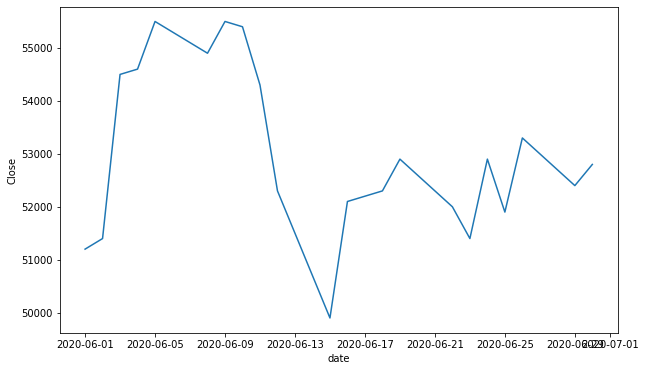

In [188]:
import seaborn as sns

sns.lineplot(x='date', y='Close', data=df)